## This program builds the VGG16 convolutional neural network model for image classification. Once built the model is stored as car_v16.h5 file in the same directory.

In [1]:
# Importing the Keras libraries and packages
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras import applications
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k
import matplotlib.pyplot as plt
from keras import optimizers 
#remove warnings 
import warnings
warnings.filterwarnings('ignore')
#import config file
import import_ipynb
import Config as c
import tensorflow as tf

importing Jupyter notebook from Config.ipynb


In [24]:
# Pre-Trained CNN Model using imagenet dataset for pre-trained weights
base_model = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (c.image_width, c.image_height, c.channels))
# Freeze layer that do not need to be trained
for layer in base_model.layers[:10]:
    layer.trainable = False

In [25]:
# Top Model Block
x = base_model.output
x = Flatten()(x)
predictions = Dense(c.num_classes, activation="softmax")(x)

In [26]:
# add your top layer block to your base model
classifier = Model(base_model.input, predictions)
#print(classifier.summary())

In [27]:
# compiling the CNN
classifier.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
# Read Data and Augment it: Make sure to select augmentations that are appropriate to your images.
# To save augmentations un-comment save lines and add to your flow parameters.
img_width, img_height = c.image_width, c.image_height
train_data_dir = c.train_data_dir
validation_data_dir = c.validation_data_dir
batch_size = c.batch_size
epochs = 15
num_classes = c.num_classes

# Initiate the train and test generators with data Augumentation


train_datagen = ImageDataGenerator(
rescale = c.rescale,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = c.zoom_range,
width_shift_range = c.width_shift_range,
height_shift_range=c.height_shift_range,
rotation_range=c.rotation_range)

test_datagen = ImageDataGenerator(
rescale = c.rescale,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = c.zoom_range,
width_shift_range = c.width_shift_range,
height_shift_range=c.height_shift_range,
rotation_range=c.rotation_range)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

Found 398 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [29]:
# Define when to stop training the model and then store the best model as car1.h5
# This will be passed while fitting the model as callbacks methods.
checkpoint = ModelCheckpoint(c.model_file, monitor='val_accuracy', verbose=1, mode='auto',save_freq =15)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto') 

In [30]:
# Find the count for train and test images
import os
train_samples = 0
validation_samples = 0

cwd = os.getcwd()
folder = c.train_data_dir
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    train_samples += len(files)


folder = c.validation_data_dir
for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder,sub_folder)))
    validation_samples += len(files)

print(train_samples)
print(validation_samples)

398
164


In [31]:
# Fit the model to the data
history_object = classifier.fit_generator(
train_generator,
steps_per_epoch = train_samples//batch_size,
epochs = 15,
callbacks = [checkpoint, early],
validation_data = validation_generator,
validation_steps = validation_samples//batch_size
)

Epoch 1/15
12/12 [==============================] - 62s 5s/step - loss: 0.6071 - accuracy: 0.6202 - val_loss: 0.4473 - val_accuracy: 0.7688
Epoch 2/15
 2/12 [====>.........................] - ETA: 47s - loss: 0.5680 - accuracy: 0.6406
Epoch 2: saving model to car_v16.h5
12/12 [==============================] - 65s 5s/step - loss: 0.3594 - accuracy: 0.7896 - val_loss: 0.3208 - val_accuracy: 0.8625
Epoch 3/15
 5/12 [===========>..................] - ETA: 27s - loss: 0.2913 - accuracy: 0.8873
Epoch 3: saving model to car_v16.h5
12/12 [==============================] - 63s 5s/step - loss: 0.2415 - accuracy: 0.9235 - val_loss: 0.2487 - val_accuracy: 0.9187
Epoch 4/15
 8/12 [===================>..........] - ETA: 16s - loss: 0.1649 - accuracy: 0.9580
Epoch 4: saving model to car_v16.h5
12/12 [==============================] - 62s 5s/step - loss: 0.1708 - accuracy: 0.9536 - val_loss: 0.2169 - val_accuracy: 0.9312
Epoch 5/15
11/12 [==========================>...] - ETA: 4s - loss: 0.1364 - acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


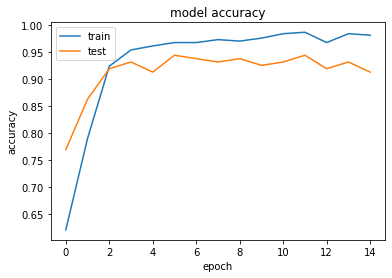

In [34]:
%matplotlib inline
print(history_object.history.keys())
plt.plot(history_object.history['accuracy'])
plt.plot(history_object.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

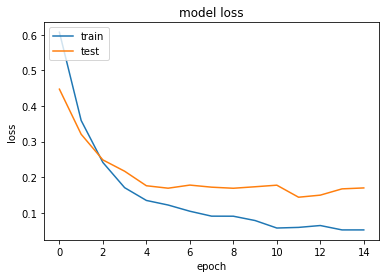

In [35]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()